<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT19/blob/bozzato/Lab-6/bozzato_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Partial differential equation**
**Bozzato Federico**

#Abstract

In the previous lab, we have talked about the initial value problem for which we have provided approximation tools. In this lab, instead, we will analyze a different problem involving differential equations: the boundary value problem both in one and two dimensions.

#About the code

**Author:** Federico Bozzato

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

#Set up environment

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import time

import numpy as np
from numpy import linalg as la

from matplotlib import tri
from matplotlib import pyplot as plt

from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

#Introduction

The boundary value problem is an ordinary differential equation where boundary conditions are specified at the boundaries of the domain where the problem is given [1]. If the problem is posed in one dimension, the boundaries are the ends of an interval; while, instead, if the the problem is posed in two or more dimensions, the boundaries could be either a curve, or a superface or even a volume.

This report is divided into three parts:
1. Methods: in this section, each algorithm is presented and explained, giving also the mathematic definition of the operation the algorithm implements.

2. Results: in this section, the results of each algorithm are presented.

3. Discussion: in this last section, results are discussed.



#Methods

This section is divided into two subsection: the mandatory part and the extra assignment.

##Mandatory assignment

###1. FEM for 1D boundary value problem $-u''(x) = f(x)$ with $u(0)=u(1)=0$

####Definition
The boundary value problem (bvp for short) is defined as

>$
  \begin{cases}
    -u''(x)=f(x),    \quad  x\in(a,b) \\
    u(a)= \alpha \\
    u(b)=\beta
  \end{cases}
$

where $f(x)\in\mathcal{C}([a,b])$, and $u(a)=\alpha$ and $u(b)= \beta$ are the boundary conditions. Since the boundary conditions involve the function $u$ itself, they are named *Dirichlet boundary condition* [1].

####Solution
We are now interested in how to find an approximation to the bvp defined as above. One way is to define a mesh dividing the interval $I=[a,b]$ into $M$ nodes, that is

>$
a=x_0 < x_1 < \dots < x_{m+1}=b
$

Now, we know that the first and second order derivatives are defined as

>$
\begin{align}
  \dfrac{du(x)}{dx}&= \lim_{h\to0} \dfrac{u(x+h)-u(x-h)}{2h} \\
  \dfrac{d^2u(x)}{dx^2}&=\lim_{h\to0} \dfrac{u(x-h) -2u(x) + u(x+h)}{h^2}
\end{align}
$

Given $u_i$, which is the approximation of $u(x)$ at the point $x_i$ of the mesh, the second order derivative can be rewritten as the following [2]:

>$
  -u''(x_i)= \dfrac{u_{i-1} - 2u_i + u_{i+1}}{h_i^2}
$

where the distance between two consecutive mesh nodes is $h_i$. As we can notice, the approximated second order derivative is defined only for the internal nodes of the mesh, because if we take the intial point $x_0$, no $u_{-1}$ is defined.

Now, we are ready to rewrite the bvp as the following system:

>$
\begin{cases}
  \dfrac{u_{0} - 2u_1 + u_{2}}{h_1^2} = f(x_1) \\
  \qquad \quad \vdots \\
  \dfrac{u_{i-1} - 2u_i + u_{i+1}}{h_1^2} = f(x_i) \\
  \qquad \quad \vdots \\
  \dfrac{u_{m-1} - 2u_m + u_{m+1}}{h_1^2} = f(x_m) 
\end{cases}
$

where the $f(x_i)$ is the value of $f$ evaluated at the $i$-th node $x_i$ of the mesh.

As we can notice, the first members of the first and last equations in the above system are different from the others, because they contain the boundary values $u_0$ and $u_{m+1}$, which can be moved to the rightside of the equation. Thus, the final form of the above system will be

>$
\begin{cases}
  \dfrac{ - 2u_1 + u_{2}}{h_1^2} = f(x_1) - \dfrac{u_0}{h_1^2} = f(x_1) - \dfrac{\alpha}{h_1^2}\\
  \qquad \quad \vdots \\
  \dfrac{u_{i-1} - 2u_i + u_{i+1}}{h_i^2} = f(x_i) \\
  \qquad \quad \vdots \\
  \dfrac{u_{m-1} - 2u_m}{h_m^2} = f(x_m) - \dfrac{u_{m+1}}{h_m^2}=f(x_m) - \dfrac{\beta}{h_m^2}\\
\end{cases}
$

The system can be rewritten in the following way:

>$
Sx=b \quad \Longleftrightarrow \quad \begin{pmatrix}
  -\dfrac{2}{h_1^2} & \dfrac{1}{h_1^2} & 0  & 0& \dots & 0 \\
  \dfrac{1}{h_2^2} & \ddots & \ddots & 0  & \dots & 0 \\
  0 & \ddots & \ddots &\ddots & 0 & 0 \\
  \vdots   & 0 & \ddots & \ddots &\ddots & 0\\
  \vdots  &\vdots & 0 & \ddots & \ddots & \dfrac{1}{h_{m-1}^2}\\
  0 & 0 & 0 & 0 & \dfrac{1}{h_m^2} & -\dfrac{2}{h_m^2}
\end{pmatrix} \begin{pmatrix}
u_1 \\
u_2 \\
u_3 \\
\vdots \\
u_{m}
\end{pmatrix} = \begin{pmatrix}
f(x_1) - \dfrac{\alpha}{h^2_1} \\
f(x_2) \\
f(x_3) \\
\vdots \\
f(x_m) - \dfrac{\beta}{h_m^2}
\end{pmatrix}
$

where $S\in\mathbb{R}^{m\times m}$ is the stiffness matrix, $b\in\mathbb{R}^m$ is the load vector and $x\in\mathbb{R}^m$ is the solution vector of $\{u(x_i)\}_{i=1}^M$.

####Implementation
The implementation follows step by step what has been explained in the previous paragraph and it can be summarized in the following steps:

1. calculate the length $h_i$ of each subinterval in the mesh;
2. calculate the stiffness matrix $S$;
3. calculate the load vector $b$;
4. add the boundary conditions to the load vector;
5. calculate the solution vector $x$ of the system $Sx=b$ with least squares;
6. add the values at the ends for the complete solution.

In [0]:
def bvp1d(fun, mesh, ua, ub):
  '''
  Solves the one dimensional boundary value problem -u''(x)= fun, with u(a)= ua
  and u(b)= ub over the mesh which discretizes the interval [a,b].
  Parameters:
  - fun: one variable function
  - mesh: mesh discritizing the interval [a,b]
  - ua: boundary condition at the point a
  - ub: boundary condition at the point b
  Output:
  - S: stiffness matrix
  - b: load vector
  - x: approximate solution of the bvp -u''(x)= fun
  '''
  if not isinstance(mesh, np.ndarray):
    mesh= np.array(mesh)
    
  n= mesh.shape[0]
  h= mesh[1:] - mesh[:-1]                     # vector of all the lengths
  inNodes= n-2                                # inNodes= number of inner nodes
  
    
  ############################
  ###   STIFFNESS MATRIX   ###
  ############################
  S= np.zeros((inNodes,inNodes))              # S is defined only for the internal
                                              # nodes
  S[0,0]= 1/h[0]**2
  S[-1,-1]= 1/h[-1]**2
  
  for i in range(0,inNodes-1):
    S[i,i]+= 1/h[i]**2
    S[i+1,i]= -1/h[i]**2
    S[i,i+1]= -1/h[i]**2
    S[i+1,i+1]+= 1/h[i]**2
    
  ############################
  #####   LOAD  FACTOR   #####     
  ############################
  b= np.zeros((inNodes,1))
  b[0]= ua/(h[0]**2)
  b[-1]= ub/(h[-1]**2)
  
  for k in range(1,n-1):
    b[k-1]+= - fun(mesh[k])                   # here the bvp is u''(x) = - fun
     
  ############################
  ###       SOLUTION       ###        
  ############################
  _x= la.lstsq(S,b,rcond=None)[0]
  
  x= np.zeros((n,1))                          # update the solution with the contraints
  x[0]= ua
  x[1:n-1]= _x
  x[-1]= ub
  x= x.flatten()
  return S, b, x

##Extra assignment

###2. FEM for 2D Poisson equation -Delta u(x) = f(x), with triangular mesh
####Definition
The definition of the 2D Poisson equation is quite similar to the definition of the one dimension boundary value problem given in the previous paragraphs. In fact, it is defined as [3]

>$
\begin{cases}
  -\Delta u= f, \qquad \text{in }\Omega \\
  u = 0, \qquad\qquad\!\!\text{on } \partial\Omega
\end{cases}
$

Using the Galerkin's finite element method [3,4], we can search an approximate solution solving the following system:

>$
\left(\nabla u,\nabla v\right)= (f,v) \qquad \forall v\in V
$

where:
* the symbol $\nabla$ indicates the gradient of a function;
* the vector $v$ is the test vector contained in the space $V$;
* the space $V$ is a Hilbert space where the approximate solution is sought.

Since the above equation must be true for all the vectors in the space $V$, we can replace the vector $v$ with a linear combination of the basis $\phi_i(x)$ of the space $V$ [5]. Then, the above equation becomes 

>$
\displaystyle \sum_{j=1}^M U(x_j)\int_{\Omega_i} \nabla\phi_j(x)^T\nabla\phi_i(x)dx = \int_{\Omega_i}f(x)\phi_i(x)dx \qquad i=1,2,\dots,M
$

where we can recognize the unknown vector $x=U(x_j)$, the entries $(\nabla\phi_j,\nabla\phi_i)$ for the stiffness matrix $S$ and the load vector $b$. Therefore, the boundary value problem can be rewritten as $Sx=b$.

####Tools
Before analyzing how to implement a solution for the 2d bvp, we need to introduce some useful functions:

1. **```generateU0```**: this function generates the boundary values on the boundary of the domain $\partial\Omega$.

2. **```quadrature```**: this function calculates the integral of a function $f$ over the triangle of vertices $x_0$, $x_1$ and $x_2$.
  
3.  **```isBoundary```**: given a vertex of a mesh, it tells wether the vertex belongs to the boundary or not.

4. **```fromVertexToCoordinates```**: given a vertex $v$, it returns the coordinates of $v$.

5. **```loc2glob```**: this function maps the local index of the vertex $v$ into its global index.

6. **```verticesSorter```**: this function sorts the vertices of the triangle $k$ so that the first vertex corresponds to the right angle. 

7. **```addBoundariesToSolution```**: this function assembles the complete solution of the boundary value problem defined over a triangular mesh.


####Implementation
The basis used for Galerkin method are the same used for the $L^2$ projection, that is the Lagrange basis. For a reference triangle of vertices $(x_0, x_1, x_2)$ and sides $\left(h_x, h_y, \sqrt{h_x^2+h_y^2}\right)$, the Lagrange basis are

>$
\begin{align*}
 \phi_0(x,y) &= 1 - \dfrac{x}{h_x} - \dfrac{y}{h_y} \\
 \phi_1(x,y) &= \dfrac{x}{h_x} \\
 \phi_2(x,y) &= \dfrac{y}{h_y}
 \end{align*}
$

and their gradients are

>$
 \begin{align*}
  \nabla\phi_0(x,y) &= \begin{pmatrix}
   -\dfrac{1}{h_x} \\
   -\dfrac{1}{h_y}
  \end{pmatrix} \\
  \nabla\phi_1(x,y) &= \begin{pmatrix}
   \dfrac{1}{h_x} \\
   0
  \end{pmatrix} \\
  \nabla\phi_2(x,y) &= \begin{pmatrix}
   0 \\
   \dfrac{1}{h_y} 
  \end{pmatrix}
 \end{align*}
$

The stiffness matrix for the reference triangle is given by

>$
S_\text{ref}= \begin{pmatrix}
 (\nabla\phi_0,\nabla\phi_0) & (\nabla\phi_0,\nabla\phi_1) & (\nabla\phi_0,\nabla\phi_2) \\
 (\nabla\phi_1,\nabla\phi_0) & (\nabla\phi_1,\nabla\phi_1) & (\nabla\phi_1,\nabla\phi_2) \\
  (\nabla\phi_2,\nabla\phi_0) & (\nabla\phi_2,\nabla\phi_1) & (\nabla\phi_2,\nabla\phi_2) \\
\end{pmatrix} = \begin{pmatrix}
 \left(\dfrac{1}{h_x^2}+\dfrac{1}{h_y^2}\right) & -\dfrac{1}{h_x^2} & -\dfrac{1}{h_y^2} \\
 -\dfrac{1}{h_x^2} & \dfrac{1}{h_x^2} & 0 \\
 -\dfrac{1}{h_y^2} & 0 & \dfrac{1}{h_y^2}
\end{pmatrix}
$

Thus, the pseudocode for the implementation results to be [5]:

```
for each element k in the mesh:
  compute loc2glob map
  
  for i in i(k):
    b_i(k)= (f,phi_i)
    
    for j in i(k):
      S[loc2glob(i),loc2glob(j)]= S_ref(i,j)
    end
  end
end
```



In [0]:
#############################################
############        TOOLS        ############
#############################################

def generateU0(mesh, meshSize, fun):
  '''
  Generates the values of the function @fun at the boundaries of the mesh @mesh 
  of size @meshSize
  Parameters:
  - mesh: mesh which is the discretization of the domain
  - meshSize: size of the mesh (along x and along y)
  - fun: function for which boundary values are wanted
  Output:
  - u0: vector of two columns. The first column is the index of the boundary node
  and the second column is the value of the function @fun evaluated in the boundaries
  '''
  
  x= mesh.x
  y= mesh.y
  Nx= meshSize[0]
  Ny= meshSize[1]
  
  nodes= []
  for row in range(0,Ny):
    if row == 0 or row == Ny-1:
      for col in range(0,Nx):
        nodes.append(col+ row*Nx)
    else:
      nodes.append(row*(meshSize[0]))
      nodes.append(row*(meshSize[0]) + meshSize[0]-1)
      
  u0= np.zeros((len(nodes),2))
  u0[:,0]= nodes

  index= 0
  for n in nodes:
    u0[index,1]= fun(mesh.x[n],mesh.y[n])
    index+= 1
  
  return u0  



def quadrature(fun, x0, x1, x2):
  '''
  Calculates the bi-dimensional integral of the function @fun over the triangle of
  vertices @x0, @x1 and @x2
  Parameters:
  - fun: function for which the integral is wanted
  - x0: list of 2d coordinates of the first vertex of the triangle
  - x1: list of 2d coordinates of the second vertex of the triangle
  - x2: list of 2d coordinates of the third vertex of the triangle
  Output:
  - integral: scalar value of the integral 
  '''
  F= np.array([ [x1[0]-x0[0], x2[0]-x0[0]],
                [x1[1]-x0[1], x2[1]-x0[1]] ])
    
  c= np.array([ [x0[0]],
                [x0[1]] ])
  
  ref= np.array([ [1/3], 
                  [1/3] ])
      
  new_ref= np.dot(F,ref) + c
  
  return fun(new_ref)



def isBoundary(v, u0):
  '''
  Returns True if v is a boundary vertex, False otherwise.
  Parameters:
  - v: vertex of the mesh
  - u0: list of boundary condition generated by @generateU0
  Output:
  - Look at the description
  '''
  return v in u0[:,0]



def fromVertexToCoordinates(mesh, v):
  '''
  Gives the coordinates in the mesh @mesh of the vertex @v.
  Paramaters:
  - mesh: mesh which is the discretization of the domain
  - v: vertex for which the coordinates are desired
  Output:
  - coord: 2d coordinates of the vertex 
  '''
  return [mesh.x[v], mesh.y[v]]



def loc2glob(inner, v):
  '''
  Maps the local index of the vertex @v into the global coordinates
  Parameters:
  - inner: list of internal nodes
  - v: vertex for which the global index is wanted
  Output:
  - glob: global index
  '''
  return np.where(inner == v)[0][0]



def verticesSorter(mesh, triangle):
  '''
  Sorts the vertices of the triangle @triangle so that the first vertex corresponds
  to the right angle. 
  Parameters:
  - mesh: mesh which is the discretization of the domain
  - triangle: list of vertices to sort
  Output:
  - newTriangle: list of sorted vertices
  '''
  x0= fromVertexToCoordinates(mesh, triangle[0])
  x1= fromVertexToCoordinates(mesh, triangle[1])
  x2= fromVertexToCoordinates(mesh, triangle[2])

  x0= np.array(x0)
  x1= np.array(x1)
  x2= np.array(x2)

  new_v0= 0
  new_v1= 0
  new_v2= 0
  if np.isclose(la.norm(x1-x2), 2**(0.5)*la.norm(x0-x1)):      # || x1-x2 || == sqrt(2) * || x0-x1 || ?
    new_v0= triangle[0]
    new_v1= triangle[1]
    new_v2= triangle[2]
  elif np.isclose(la.norm(x0-x2), 2**(0.5)*la.norm(x1-x2)):    # || x0-x2 || == sqrt(2) * || x1-x2 || ?
    new_v0= triangle[1]
    new_v1= triangle[2]
    new_v2= triangle[0]
  else:                                                        # || x0-x1 || == sqrt(2) * || x2-x0 || ?
    new_v0= triangle[2]
    new_v1= triangle[0]
    new_v2= triangle[1]

  return [new_v0, new_v1, new_v2]



def addBoundariesToSolution(meshSize, _x, nodes, u0):
  '''
  Assembles the complete solution of the boundary value problem defined over a 
  triangular mesh of size @meshSize
  Parameters:
  - meshSize: size of the mesh (along x and along y)
  - _x: list of the approximated solution in the internal nodes of the mesh
  - nodes: internal nodes of the mesh
  - u0: boundary constraints generated by @generateU0
  Output:
  - x: complete solution of the boundary value problem
  '''
  Nx= meshSize[0]
  Ny= meshSize[1]
  x= np.zeros((Nx*Ny,1))

  for i in range(Nx*Ny):
    if i in u0[:,0]:
      ind= np.where(u0[:,0] == i)[0][0]
      x[i]= u0[ind,1]
    else:
      ind= np.where(nodes == i)[0][0]
      x[i]= _x[ind]
      
  return x.flatten()

In [0]:

#############################################
############        BVP2D        ############
#############################################
def bvp2d(fun, mesh, meshSize, u0):
  '''
  Solves the two dimensional boundary value problem -u''(x)= fun, with u(boundary) = 0
  over the mesh which discretizes the domain [0,T]x[0,T]
  Parameters:
  - fun: two variables function
  - mesh: mesh discritizing the interval domain [0,T]x[0,T]
  - u0: list of vertices belonging to the boundary and the values the function takes
  at that point (for the moment, these values must be 0)
  Output:
  - S: stiffness matrix
  - b: load vector
  - x: approximate solution of the bvp -u''(x)= fun
  '''
  
  ############################
  ###    INTERNAL NODES    ###
  ############################
  def internalNodes():
    Nx= meshSize[0]
    Ny= meshSize[1]
    
    n= []
    for v in range(0,Nx*Ny):
      if not isBoundary(v, u0):
        n.append(v)

    return np.array(n)
    
    
  ############################
  ###   STIFFNESS MATRIX   ###
  ############################  
  def stiffnessAssembler(mini_stiffness):
    S= np.zeros((nInnerNodes,nInnerNodes))              # global stiffness matrix
    for k in range(0, triangles.shape[0]):
      tr= verticesSorter(mesh, triangles[k,:])          # REMEMBER: tr[:,0]= x0, tr[:,1]= x1, tr[:,2]= x2

      for i in range(3):
        for j in range(3):
          if (not isBoundary(tr[i], u0)) and (not isBoundary(tr[j], u0)):         
            ind0= loc2glob(nodes, tr[i])
            ind1= loc2glob(nodes, tr[j])

            S[ind0, ind1]+= mini_stiffness[i,j]
    
    return S
  
  
  ############################
  #####   LOAD  FACTOR   #####     
  ############################
  def loadAssembler():
    b= np.zeros((nInnerNodes,1))
    for k in range(0, triangles.shape[0]):
      tr= verticesSorter(mesh, triangles[k,:])          # REMEMBER: tr[:,0]= x0, tr[:,1]= x1, tr[:,2]= x2

      v0= fromVertexToCoordinates(mesh, tr[0])
      v1= fromVertexToCoordinates(mesh, tr[1])
      v2= fromVertexToCoordinates(mesh, tr[2])

      if not isBoundary(tr[0], u0):
        index= loc2glob(nodes, tr[0])
        b[index]+= quadrature(fun, v0, v1, v2)

      if not isBoundary(tr[1], u0):
        index= loc2glob(nodes, tr[1])
        b[index]+= quadrature(fun, v0, v1, v2)

      if not isBoundary(tr[2], u0):
        index= loc2glob(nodes, tr[2])
        b[index]+= quadrature(fun, v0, v1, v2)
        
      #TODO: generalize the bvp2d for non-zero constraints!
    return b
  
  ############################
  ###       SOLUTION       ###        
  ############################
  if not isinstance(u0,np.ndarray):
    u0= np.array(u0)
    
  x= mesh.x
  y= mesh.y

  h_x= max(x[1:] - x[:-1])
  h_y= max(y[1:] - y[:-1])

  # stifnness matrix for the reference triangle
  s00= 1/h_x**2 + 1/h_y**2
  s01= -1/h_x**2
  s02= -1/h_y**2
  s11= 1/h_x**2
  s12= 0
  s22= 1/h_y**2

  mini_stiffness= np.array( [[s00, s01, s02],
                             [s01, s11, s12],
                             [s02, s12, s22]] )         # stiffness matrix for 
                                                        # the reference triangle
    
  Nx= meshSize[0]
  Ny= meshSize[1]
    
  nInnerNodes= (Nx-2)*(Ny-2)                            # number of internal nodes
  nodes= internalNodes()                                # internal nodes
  
  triangles= mesh.triangles                             # all the elements in the mesh    
  
  S= stiffnessAssembler(mini_stiffness)                 # stiffness matrix assembly
  b= loadAssembler()                                    # load vector assembly
  
  # solution
  _x= la.lstsq(S,b,rcond=None)[0]                       # solve Sx=b
  
  x= addBoundariesToSolution(meshSize, _x, nodes, u0)   # update the solution with the contraints
  x= x/3
  return S, b, x

#Results
In this section, the two function presented in the previous pragraphs will be tested, especially analyzing the evolution of the execution time with the increasing of the number of subintervals and the residuals between the approximate solution and the analytic one.

##Boundary value problem in 1D
The function **```bvp1d```** will be tested with the following functions:

1. $
\begin{cases}
u''(x)= u \\
u(-1)= -1 \\
u(1)= 1
\end{cases} \qquad \qquad u(x)= \dfrac{e}{e^2-1}\left(e^x-e^{-x}\right)
$

2. $
\begin{cases}
u''+4u=0 \\
u(0)=-2 \\
u\left(\dfrac{\pi}{4}\right)=2
\end{cases} \qquad \qquad u(x)=-2\cos{2x}+2\sin{2x}
$

3. $
\begin{cases}
u''(x)=10 \\
u(-1)= 19 \\
u(2)= 22
\end{cases} \qquad \qquad u(x)=5x^2-4x+10
$
 



################################################################################
##############                 BVP n° 1                    #####################
################################################################################


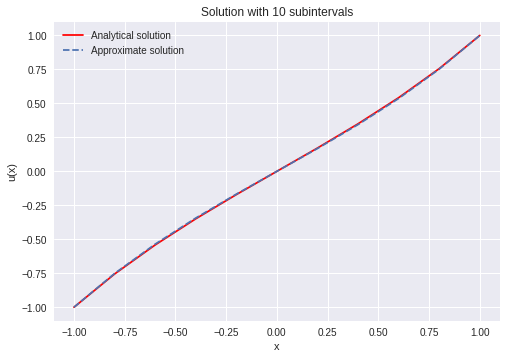

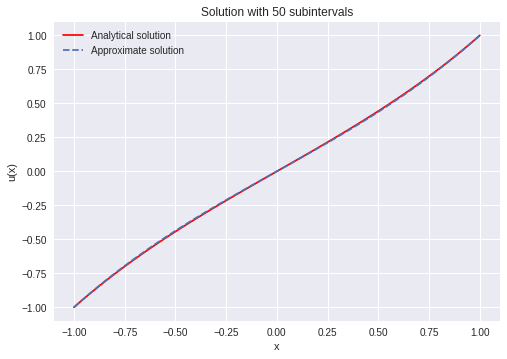

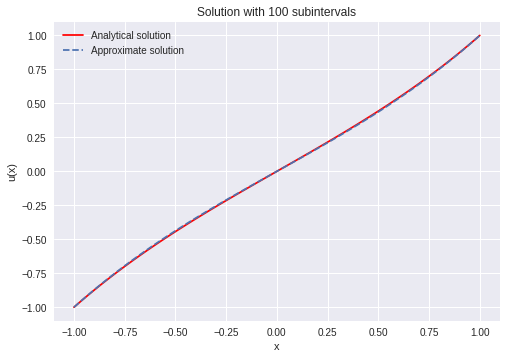

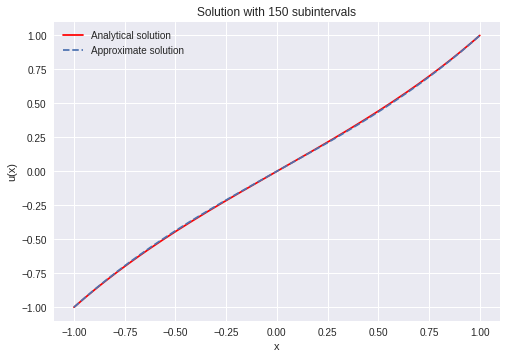

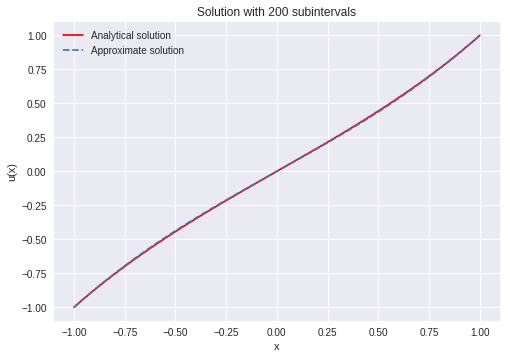

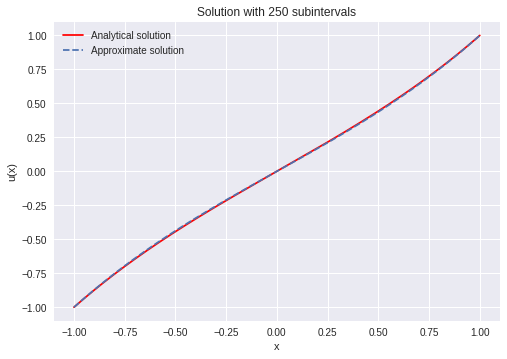

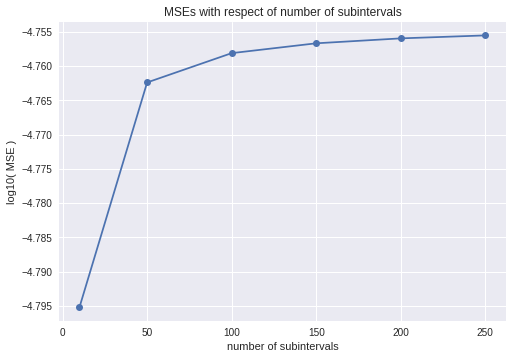

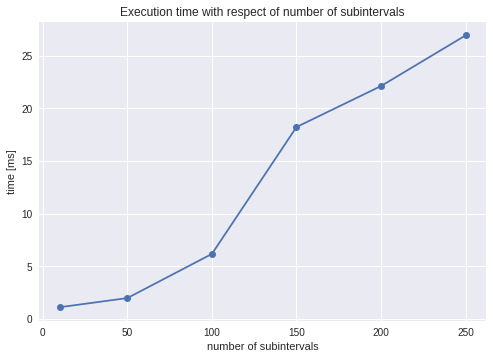

################################################################################
##############                 BVP n° 2                    #####################
################################################################################


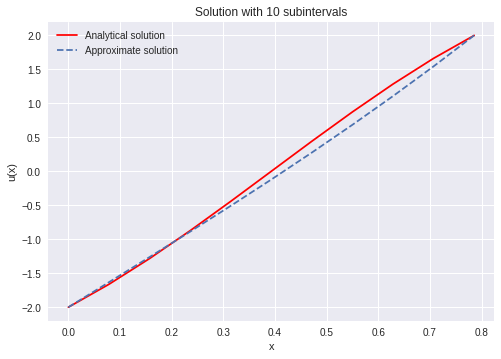

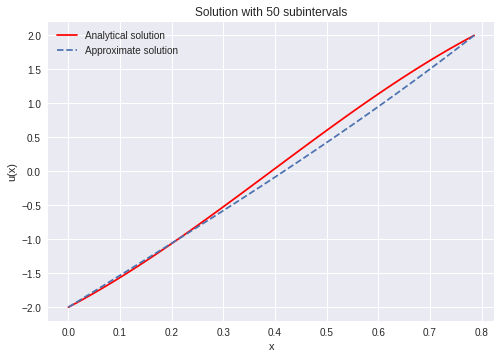

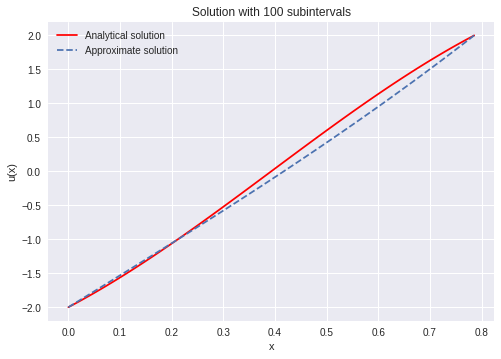

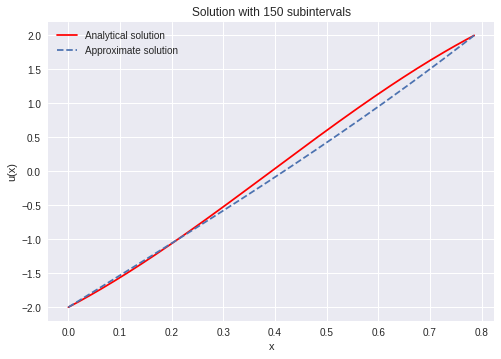

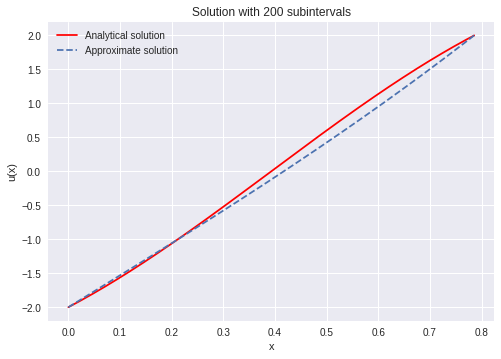

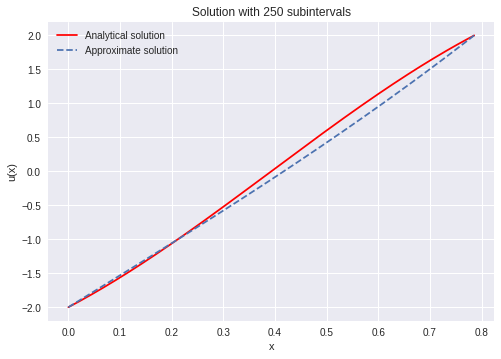

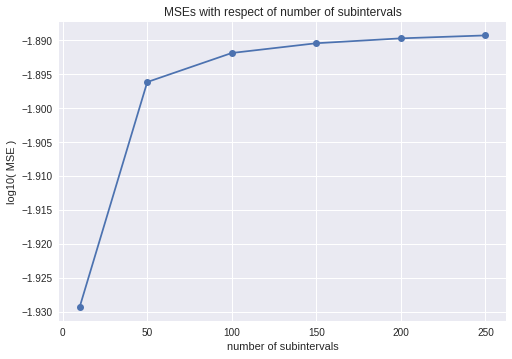

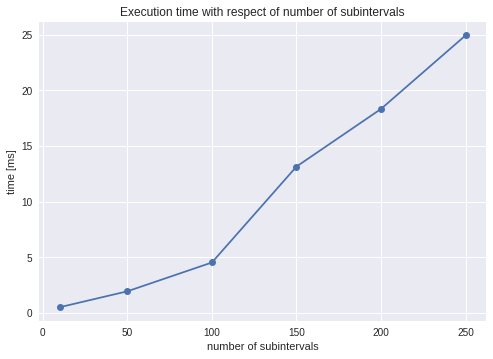

################################################################################
##############                 BVP n° 3                    #####################
################################################################################


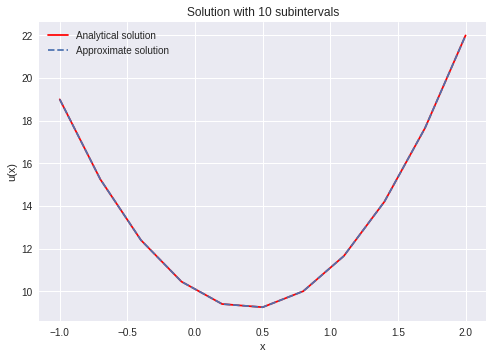

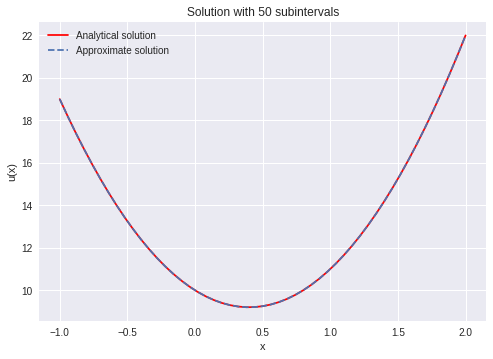

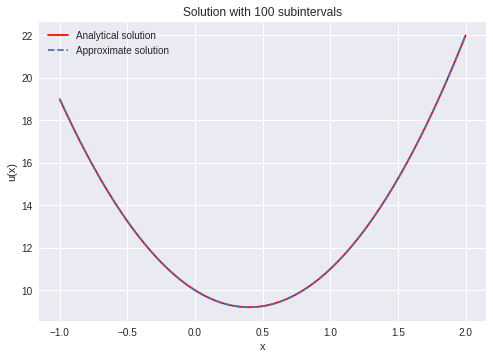

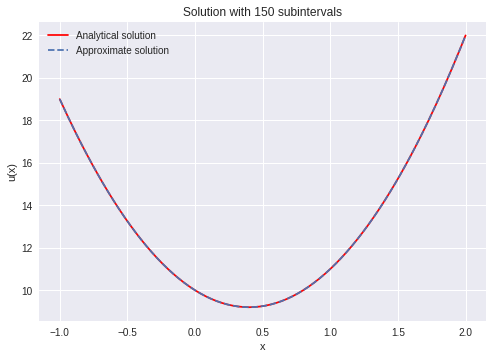

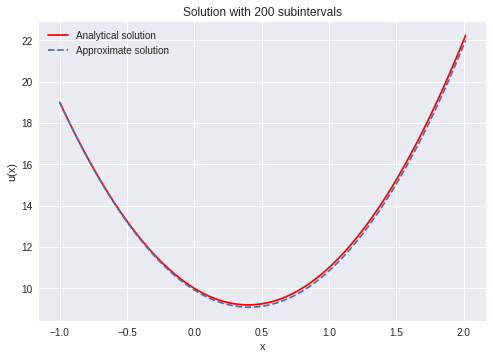

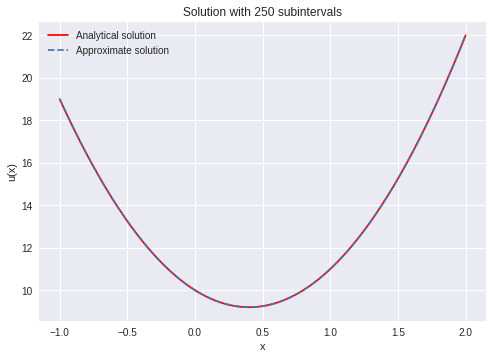

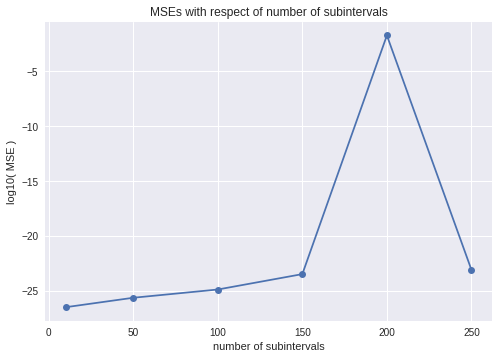

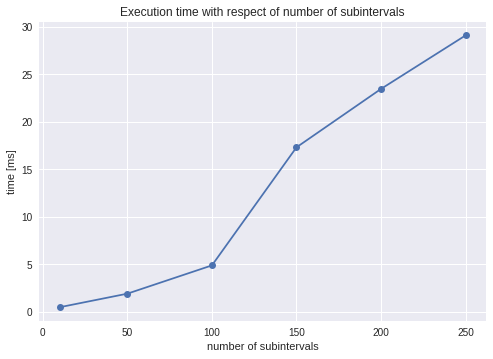

In [6]:
def printStat(apprFun, exactFun, a, b):
  N= [10, 50, 100, 150, 200, 250]
  
  exe= []
  MSE= []
  for i in N:
    step= (b-a)/i
    mesh= np.array([x for x in np.arange(a,b+step,step)])
    
    start= time.time()
    _, _, appr= bvp1d(apprFun, mesh, exactFun(a), exactFun(b))
    end= time.time()
    
    exact= np.array(exactFun(mesh))

    exe.append(end-start)
    
    res= np.abs(appr - exact)**2
    
    mse= np.sum(res)/ len(mesh)
    MSE.append(mse)
    
    plt.figure()
    plt.plot(mesh,exact,'r')
    plt.plot(mesh, appr, '--')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend(['Analytical solution', 'Approximate solution'])
    plt.title('Solution with {} subintervals'.format(i))
    plt.show()
  
  plt.figure()
  plt.plot(N,np.log10(MSE),'-o')
  plt.title('MSEs with respect of number of subintervals')
  plt.xlabel('number of subintervals')
  plt.ylabel('log10( MSE )')
  plt.show()
  
  exe= np.array(exe)
  plt.figure()
  plt.plot(N,1000*exe,'-o')
  plt.title('Execution time with respect of number of subintervals')
  plt.xlabel('number of subintervals')
  plt.ylabel('time [ms]')
  plt.show()

print('################################################################################')
print('##############                 BVP n° 1                    #####################')
print('################################################################################')
def exactFun(x):
	e= np.e
	C1= -e/(e**2-1)
	C2= -C1
	return C1*np.e**(-x)+C2*np.e**x

def apprFun(x):
  return x

printStat(apprFun, exactFun, -1, 1)

print('################################################################################')
print('##############                 BVP n° 2                    #####################')
print('################################################################################')
def exactFun(x):
  return -2*np.cos(2*x) + 2*np.sin(2*x)

def apprFun(x):
  return 4*x

printStat(apprFun, exactFun, 0, np.pi/4)

print('################################################################################')
print('##############                 BVP n° 3                    #####################')
print('################################################################################')
def exactFun(x):
  return 5*x**2 - 4*x + 10

def apprFun(x):
  return 10

printStat(apprFun, exactFun, -1, 2)



##Boundary value problem in 2D
The function **```bvp2d```** will be tested with the following problems:

1. $
\begin{cases}
\Delta u=6xy^2(2x-1)(y-1)^2 + 2(x-1)x^3(6y^2-6y+1) \\
u(0,y)=u(1,y)=u(x,0)=u(x,1)=0
\end{cases} \qquad \qquad u(x,y)= x^3y^2(x-1)(y-1)^2
$

2. $
 \begin{cases}
 \Delta u= 6xy(x^2+y^2-x-y) - 2x^2(x-1) - 2y^2(y-1) \\
 u(0,y)=u(1,y)=u(x,0)=u(x,1)=0
 \end{cases} \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad  u(x,y)= x^2y^2(x-1)(y-1)
$

################################################################################
##############                 BVP n° 1                    #####################
################################################################################


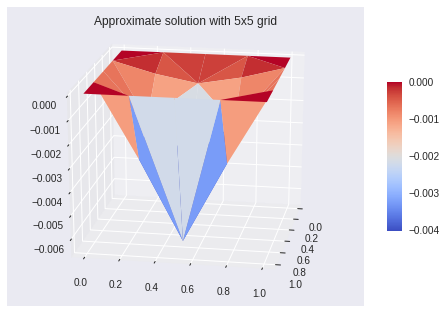

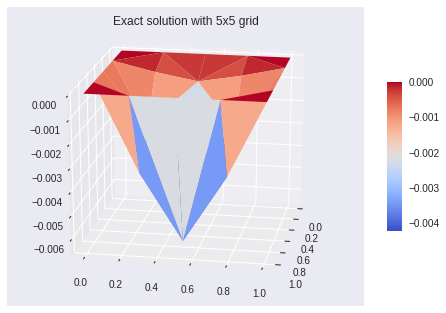

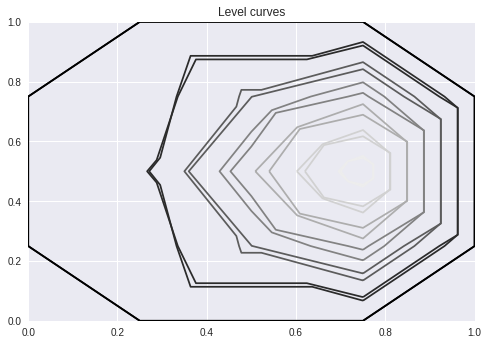

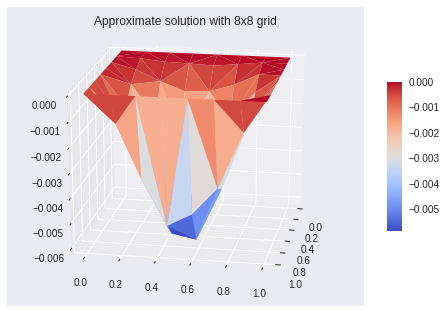

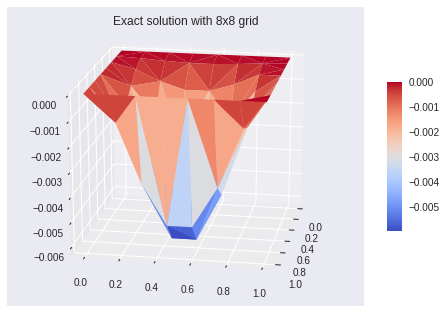

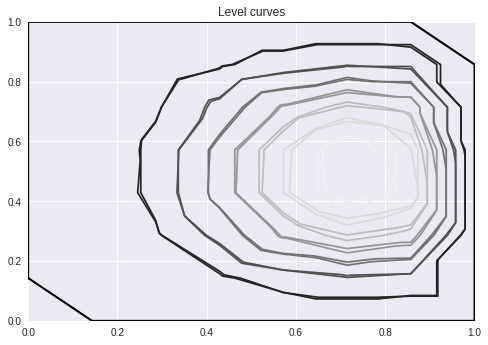

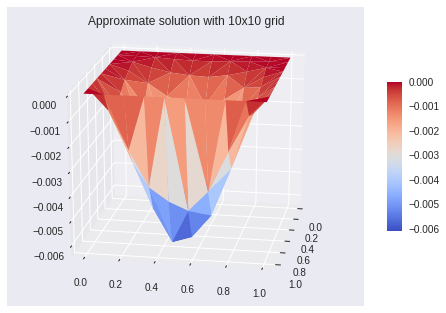

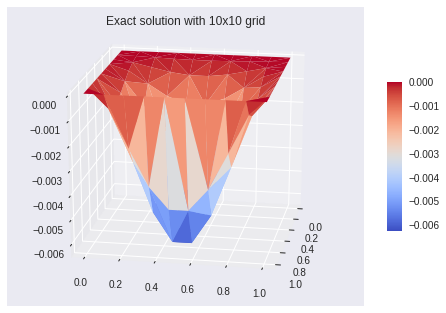

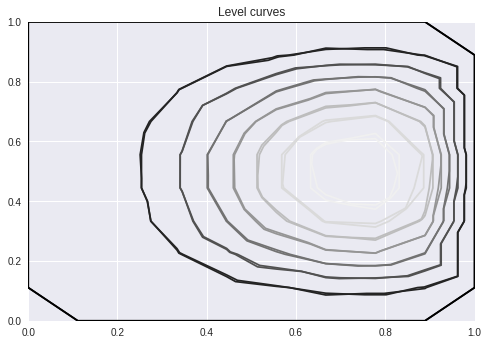

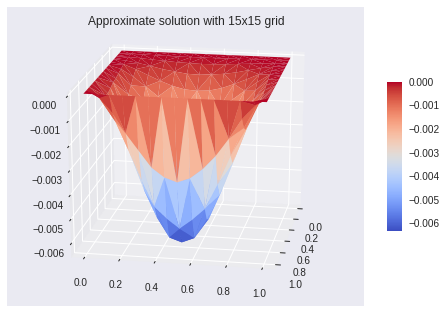

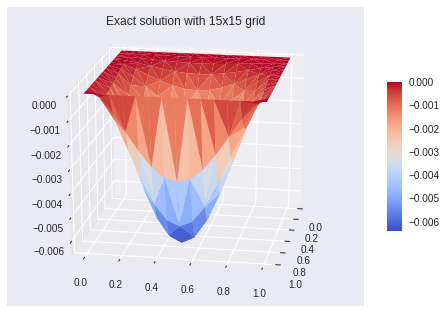

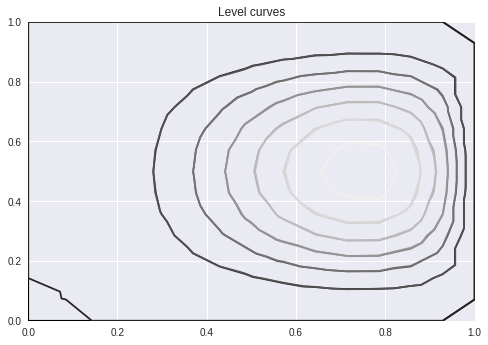

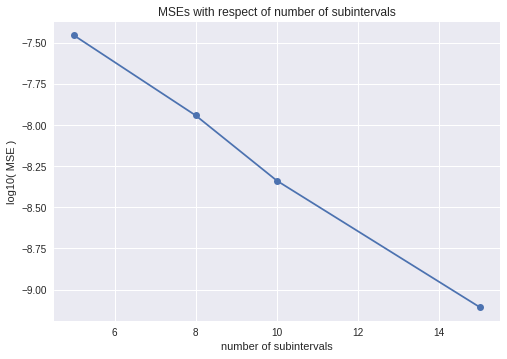

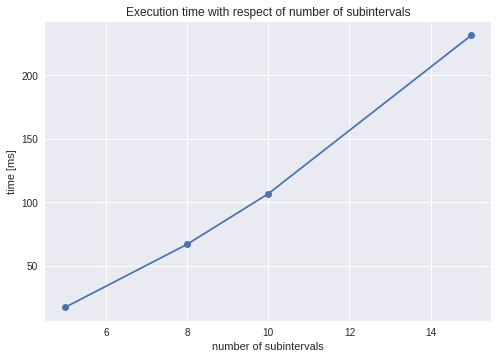

################################################################################
##############                 BVP n° 2                    #####################
################################################################################


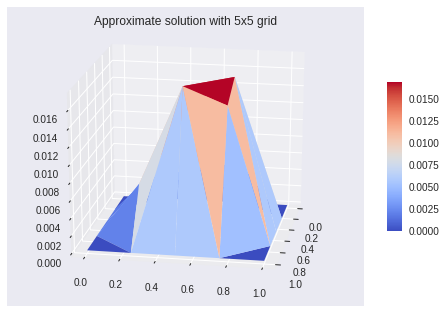

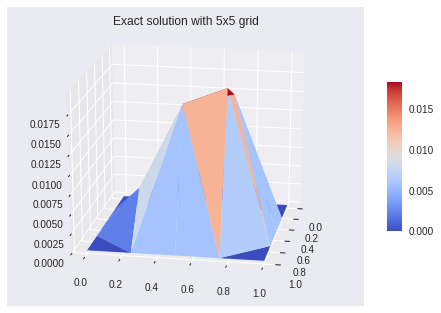

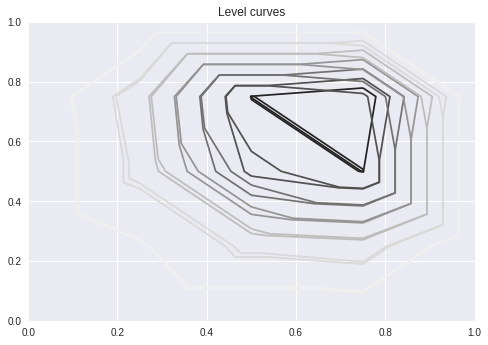

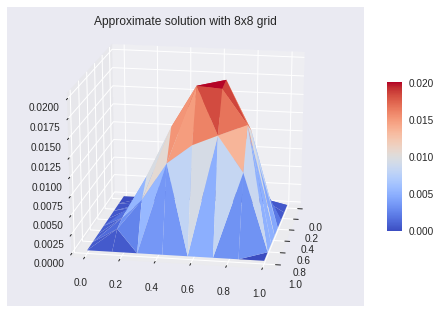

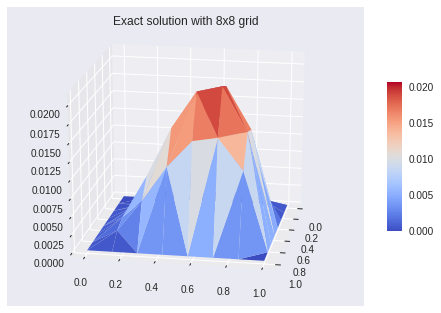

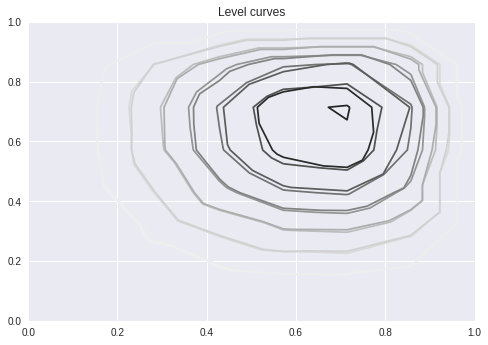

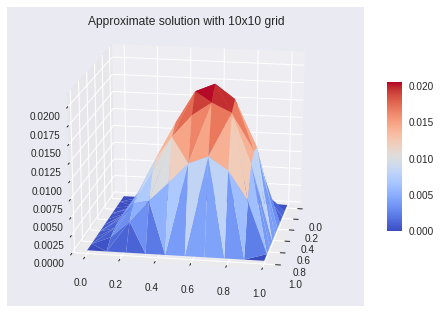

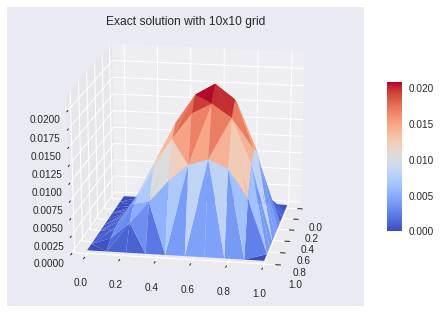

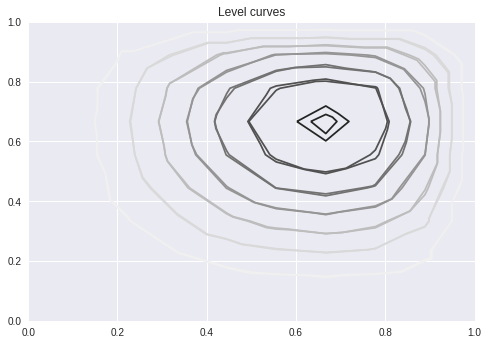

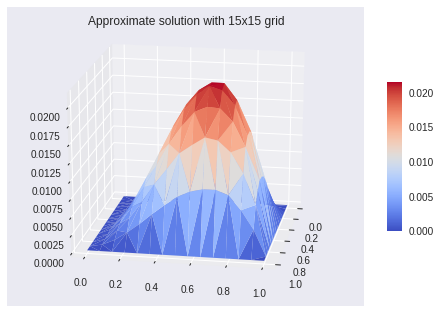

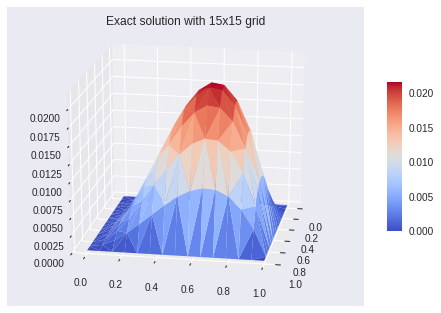

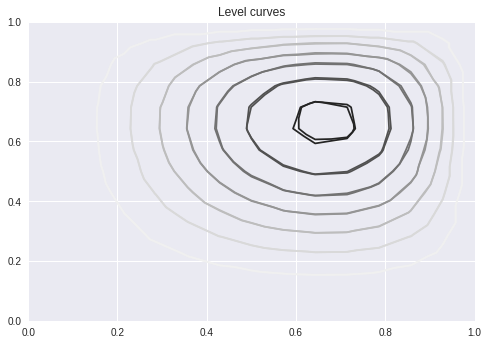

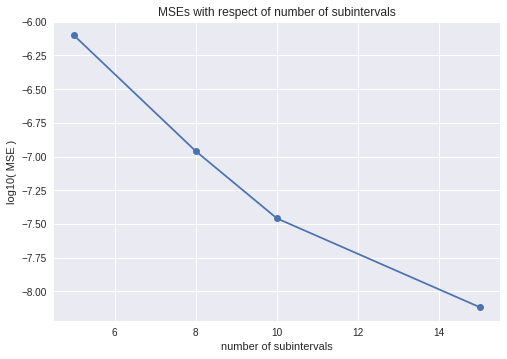

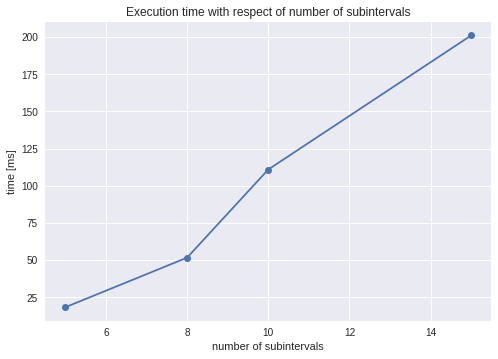

In [7]:
def createMesh(Nx,Ny):
  hx= 1 / (Nx-1)
  hy= 1 / (Ny-1)
  
  x = np.zeros((Nx*Ny))
  y = np.zeros((Nx*Ny))
  for i in range(Nx):
    for j in range(Ny):
      x[i*Nx + j] = j*hx
      y[i*Nx + j] = i*hy

  mesh = tri.Triangulation(x,y)
  
  return mesh

################################################################################

def printStat2D(apprFun, exactFun):
  N= [5, 8, 10, 15]
  
  exe= []
  MSE= []
  for i in N:
    mesh= createMesh(i,i)
    x= mesh.x
    y= mesh.y
    U0= generateU0(mesh, [i,i], exactFun)
    
    start= time.time()
    _, _, appr= bvp2d(apprFun, mesh, [i,i], U0)
    end= time.time()
    
    exact= np.array(exactFun(x,y))

    exe.append(end-start)
    
    res= np.abs(appr - exact)**2
    
    mse= np.sum(res)/ len(x)
    MSE.append(mse)
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    surf = ax1.plot_trisurf(mesh, appr, cmap=plt.cm.coolwarm)
    fig.colorbar(surf, shrink=0.5, aspect=10)
    ax1.view_init(20,10)
    plt.title('Approximate solution with {}x{} grid'.format(i,i))
    plt.show()
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    surf = ax1.plot_trisurf(mesh, exact, cmap=plt.cm.coolwarm)
    fig.colorbar(surf, shrink=0.5, aspect=10)
    ax1.view_init(20,10)
    plt.title('Exact solution with {}x{} grid'.format(i,i))
    plt.show()
    
    plt.figure()
    plt.tricontour(mesh, exact)
    plt.tricontour(mesh, appr)
    plt.title('Level curves')
    plt.legend(['Analytical solution', 'Approximate solution'])
    plt.show()
    
    #plt.figure()
    
    #plt.title('appr')
    #plt.show()
    
  
  plt.figure()
  plt.plot(N,np.log10(MSE),'-o')
  plt.title('MSEs with respect of number of subintervals')
  plt.xlabel('number of subintervals')
  plt.ylabel('log10( MSE )')
  plt.show()
  
  exe= np.array(exe)
  plt.figure()
  plt.plot(N,1000*exe,'-o')
  plt.title('Execution time with respect of number of subintervals')
  plt.xlabel('number of subintervals')
  plt.ylabel('time [ms]')
  plt.show()


print('################################################################################')
print('##############                 BVP n° 1                    #####################')
print('################################################################################')

def exactFun(x,y):
  return x**3*(x-1)*y**2*(y-1)**2

def apprFun(u):
  x= u[0]
  y= u[1]
  
  g_xx= 6*x*y**2*(2*x-1)*(y-1)**2
  g_yy= 2*(x-1)*x**3*(6*y**2-6*y+1)
  
  return  -(g_xx + g_yy)

printStat2D(apprFun, exactFun)

print('################################################################################')
print('##############                 BVP n° 2                    #####################')
print('################################################################################')

def exactFun(x,y):
  return x**2*y**2*(x - 1)*(y - 1)

def apprFun(u):
  x= u[0]
  y= u[1]
  
  return -(6*x*y*(x**2 + y**2 - x - y) - 2*x**2*(x - 1) - 2*y**2*(y - 1))

printStat2D(apprFun, exactFun)

# **Discussion**

Summarize your results and your conclusions. Were the results expected or surprising. Do your results have implications outside the particular problem investigated in this report? 

#References

[1] from Lecture Notes, *Boundary values problems, chapter 16*, pg. 215

[2] from Youtube, [ch10 5. Finite Difference method for two-point boundary value problem. Wen Shen](https://www.youtube.com/watch?v=hCjPyeA4A9Q)

[3] from Lecture Notes, *Homogeneous Dirichlet boundary conditions, chapter 17*, pg. 234

[4] from Wikipedia, *[Galerkin method](https://en.wikipedia.org/wiki/Galerkin_method)*

[5] from notes taken in class on date February 19th, 2019

[fast stiffness](https://www.hindawi.com/journals/jam/2014/932314/)

[MIT Numerical Methods for PDE Lecture 3: Finite Difference for 2D Poisson's equation](https://www.youtube.com/watch?v=bLiaz-IHX_Y)

